In [1]:
import os
from datetime import datetime
#from datetime import date
import pymysql
from sqlalchemy import create_engine
from decouple import config 
from dotenv import load_dotenv
import pandas as pd
from numpy import int16
from enum import Enum

In [2]:
# Using enum class create enumerations
class Constante(Enum):
   march_1_2021 = "2021-03-01"
   specific = "2021-06-14"

In [3]:
load_dotenv()
# get the environment variables needed
USER= config('USRCaris')
PASSWORD= config('PASSCaris')
HOSTNAME= config('HOSTCaris')
DBNAME= config('DBCaris')

# get the engine to connect and fetch
engine = create_engine(f"mysql+pymysql://{USER}:{PASSWORD}@{HOSTNAME}/{DBNAME}")
query = f'''
    SELECT 
    agent_username, COUNT(*) AS nbre,
    dsd.organisation,
    dsd.timeEnd as entry_date
FROM
    caris_db.dreams_surveys_data dsd
WHERE
    dsd.timeEnd >= '{Constante.specific.value}'
GROUP BY agent_username
'''

agent = pd.read_sql_query(query,engine,parse_dates=True)
# get the test excel file from Query

# close the pool of connection
engine.dispose()

## Agent DREAMS sortant du Systeme

In [4]:
agent.rename(columns={'agent_username':'username'},inplace=True)
agent

,username,nbre,organisation,entry_date
0,2davy,47,CARIS,2021-07-02 19:35:55
1,2diegoarmando,69,CARIS,2021-06-23 18:09:57
2,2eliona,12,CARIS,2021-06-18 16:53:59
3,2ernst,62,CARIS,2021-06-24 08:47:31
4,2gerald,65,CARIS,2021-06-22 16:01:04
5,2roselord,67,CARIS,2021-06-24 19:40:51
6,2wilnes,36,CARIS,2021-07-04 18:15:46
7,2woodridchard,8,CARIS,2021-07-01 13:00:29
8,6dasline,33,CARIS,2021-07-03 13:12:47
9,6fenide,39,CARIS,2021-06-26 17:50:14


In [5]:
agent_name = pd.read_excel("caris-test_users_7453177b42914ad2978e3c465e39dab1.xlsx")

In [6]:
agent_name = agent_name[["username","name"]]

## Liste de tous les agents avec Leur nom

In [7]:
agent_name

,username,name
0,1aldonzar,elcie aldonzar
1,1alexandra,Alexandra Joseph
2,1annuelle,Annuelle Eustache
3,1claudius,Claudius Gladys
4,1coldina,Coldina Duverny
...,...,...
742,s2julnor,Julnor Beaubrun
743,s2mirlene,Vernet Mirlene
744,stfleur,Jesula St Fleur
745,sylvietest,sylvie rousseau


## MERGE (Vlookup)

In [8]:
performanceAgents = agent_name.merge(agent,on="username",how="inner")

In [10]:
performanceAgents

,username,name,nbre,organisation,entry_date
0,2davy,Jean Davy Mexil,47,CARIS,2021-07-02 19:35:55
1,2diegoarmando,Diego Armando Dorlean,69,CARIS,2021-06-23 18:09:57
2,2eliona,Eliona Fredly,12,CARIS,2021-06-18 16:53:59
3,2ernst,Ernst Belabre,62,CARIS,2021-06-24 08:47:31
4,2gerald,Gerald Poteau,65,CARIS,2021-06-22 16:01:04
5,2roselord,Rose-Lord Despeignes,67,CARIS,2021-06-24 19:40:51
6,2wilnes,Gerant Louis Wilnes,36,CARIS,2021-07-04 18:15:46
7,2woodridchard,Wood-Ridchard Bon,8,CARIS,2021-07-01 13:00:29
8,6dasline,Dasline Sajet,33,CARIS,2021-07-03 13:12:47
9,6fenide,Fénide Sèvère,39,CARIS,2021-06-26 17:50:14


In [11]:
performanceAgents.nbre.sum()

798

In [12]:
 import matplotlib.pyplot as plt
 import seaborn as sns
 %matplotlib inline

In [13]:
from datetime import datetime
date_du_jour = datetime.today().strftime("%d_%m_%Y")

In [46]:
orderdata = performanceAgents.nbre.sort_values().to_list()

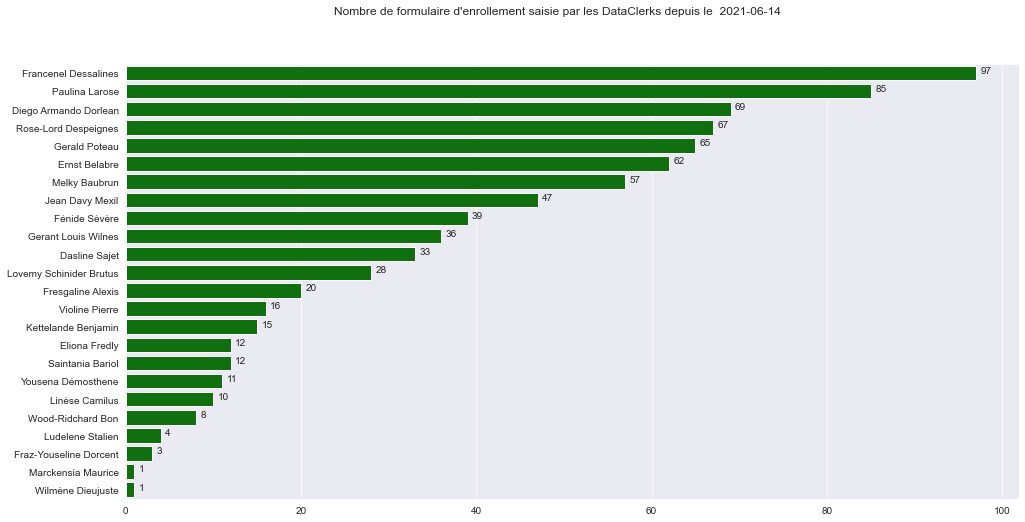

In [59]:
plt.figure(figsize=(16,8))
#plt.subplots(figsize=(16,8))
sns.set_style("darkgrid")
splot = sns.barplot(x="nbre",y="name",data=performanceAgents,color="Green",order=performanceAgents.sort_values("nbre",ascending=False).name)
splot.set_xlabel("")
splot.set_ylabel("")
plt.suptitle(f"Nombre de formulaire d'enrollement saisie par les DataClerks depuis le  {Constante.specific.value}")
for p in splot.patches:
    width = p.get_width()
    plt.text(0.5+p.get_width(), p.get_y()+0.50*p.get_height(),
             '{:1.0f}'.format(width))

plt.savefig(f"saisie_screening_{date_du_jour}",dpi=400)

In [58]:
performanceAgents.to_excel(f"performance_formulaire_denrolement_{date_du_jour}.xlsx",index=False,na_rep="NULL")